In [1]:
# Install missing packages
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install nltk
%pip install wordcloud

# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
import warnings

warnings.filterwarnings('ignore')
nltk.download('stopwords')

from nltk.corpus import stopwords

# 2. Load Data
df = pd.read_csv("../data/raw/fake_job_postings.csv")
print(f"Shape: {df.shape}")
df.head()


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssaur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Shape: (17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

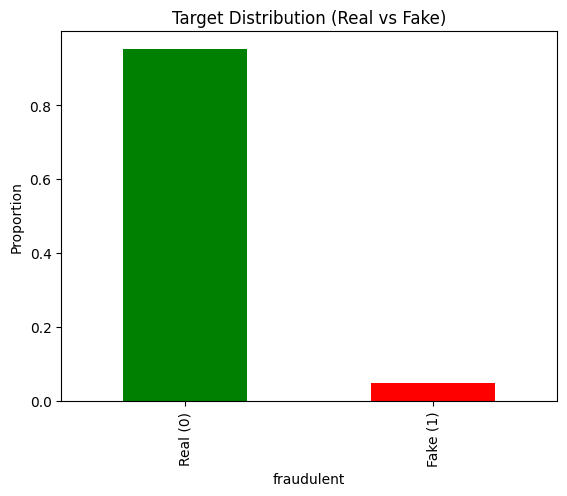

In [2]:
# Check for nulls and data types
df.info()

# Target distribution
df['fraudulent'].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title("Target Distribution (Real vs Fake)")
plt.xticks([0,1], ['Real (0)', 'Fake (1)'])
plt.ylabel("Proportion")
plt.show()


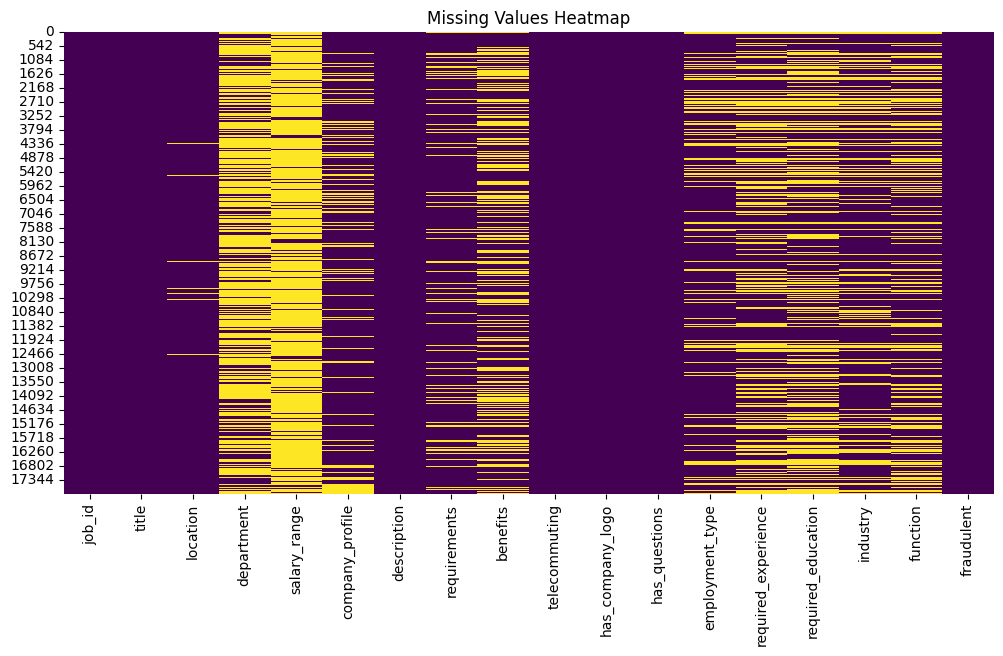

salary_range           83.959732
department             64.580537
required_education     45.329978
benefits               40.335570
required_experience    39.429530
function               36.101790
industry               27.421700
employment_type        19.412752
company_profile        18.501119
requirements           15.078300
dtype: float64

In [3]:
# Heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# % of missing
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False).head(10)


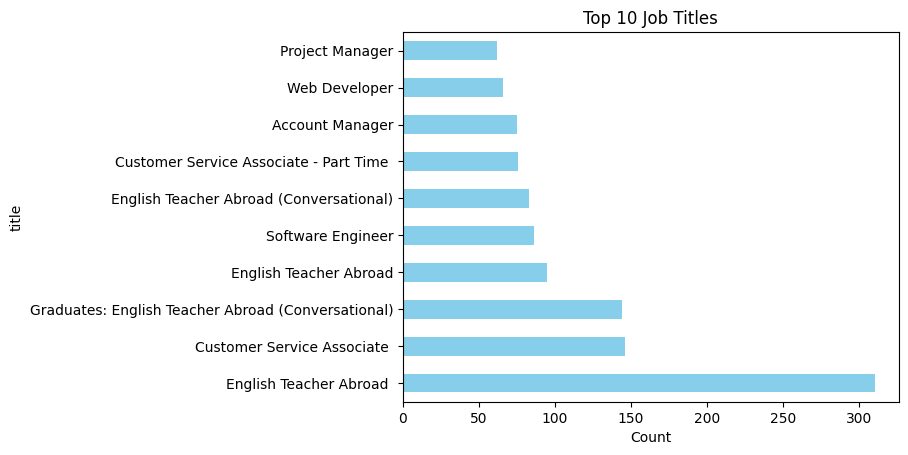

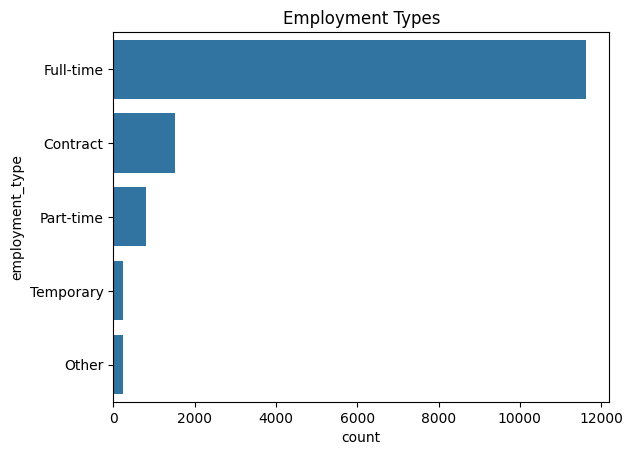

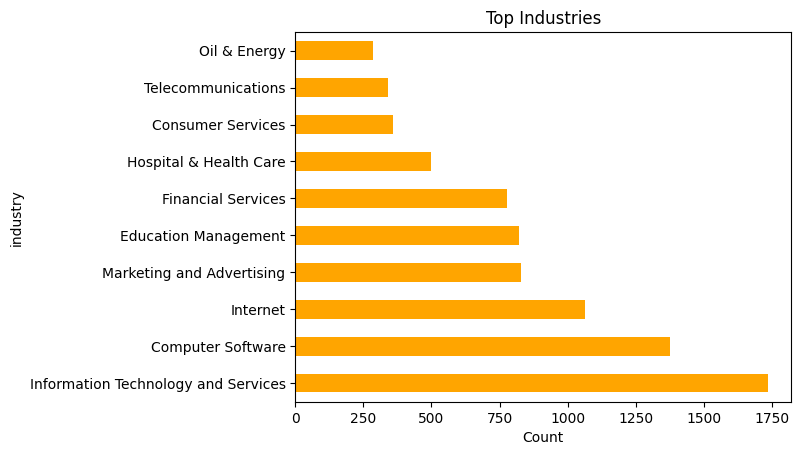

In [4]:
# Top job titles
df['title'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Job Titles")
plt.xlabel("Count")
plt.show()

# Employment types
sns.countplot(data=df, y='employment_type', order=df['employment_type'].value_counts().index)
plt.title("Employment Types")
plt.show()

# Industry
df['industry'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title("Top Industries")
plt.xlabel("Count")
plt.show()


In [6]:
# Text cleaning helper
def clean_text(text):
    stop_words = set(stopwords.words('english'))
    text = str(text).lower()
    words = text.split()
    words = [w for w in words if w.isalpha() and w not in stop_words]
    return ' '.join(words)


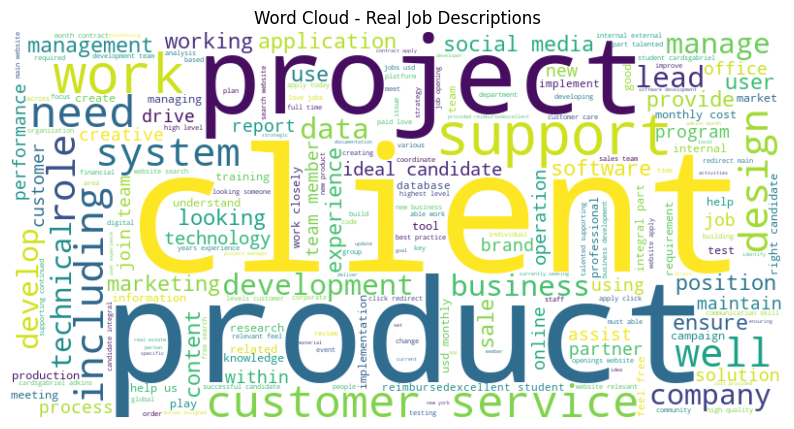

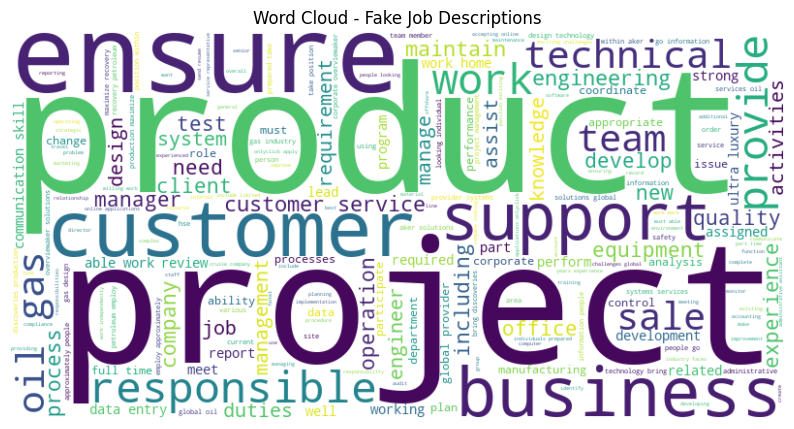

In [7]:
# Word clouds for real and fake jobs
real_text = df[df['fraudulent'] == 0]['description'].dropna().apply(clean_text).str.cat(sep=' ')
fake_text = df[df['fraudulent'] == 1]['description'].dropna().apply(clean_text).str.cat(sep=' ')

# Real jobs
plt.figure(figsize=(10, 6))
wc = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.imshow(wc, interpolation='bilinear')
plt.title("Word Cloud - Real Job Descriptions")
plt.axis('off')
plt.show()

# Fake jobs
plt.figure(figsize=(10, 6))
wc = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.imshow(wc, interpolation='bilinear')
plt.title("Word Cloud - Fake Job Descriptions")
plt.axis('off')
plt.show()


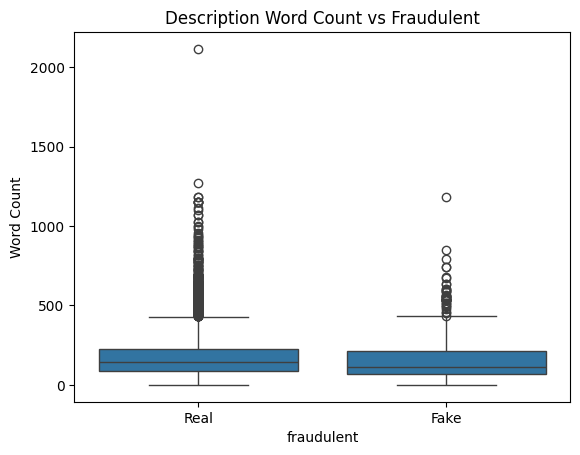

In [8]:
df['desc_len'] = df['description'].apply(lambda x: len(str(x).split()))
sns.boxplot(x='fraudulent', y='desc_len', data=df)
plt.title("Description Word Count vs Fraudulent")
plt.xticks([0,1], ['Real', 'Fake'])
plt.ylabel("Word Count")
plt.show()


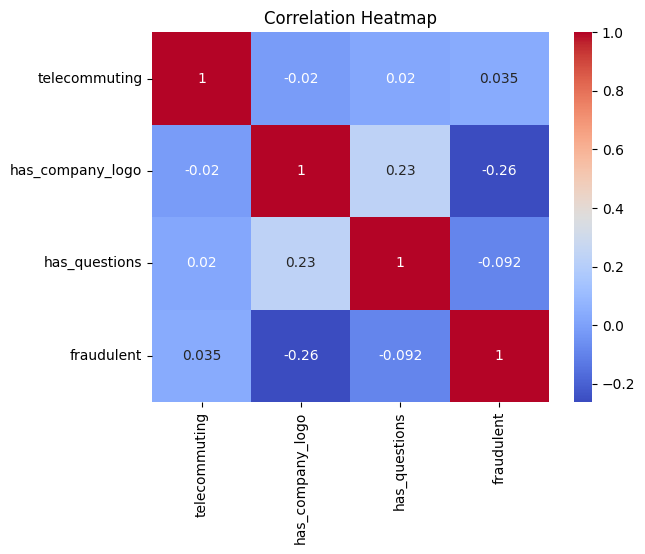

In [9]:
# Only numeric columns
corr = df[['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [14]:
import os

# Optional: Preprocessing before saving
df_clean = df.drop(columns=['desc_len'])  # remove added column

# Ensure the directory exists
os.makedirs('..artifacts', exist_ok=True)

df_clean.to_csv('..artifacts/clean_data.csv', index=False)
print("Cleaned data saved.")


Cleaned data saved.


In [16]:
%pip install missingno

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)


Note: you may need to restart the kernel to use updated packages.


In [36]:
df = pd.read_csv('../data/raw/fake_job_postings.csv')
df.shape
df.head(100)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Senior Marketing Manager,"US, ,",Marketing,NaN,Industrial Color Software is a division of Ind...,Senior Marketing ManagerOur photography and vi...,"Reporting to the VP Marketing, this person wil...",Full benefits,0,1,0,Full-time,Director,Master's Degree,Internet,Marketing,0
96,97,Software Test Engineer [QA]: Cucumber / LAMP /...,"GB, , London",NaN,NaN,At LendInvest fundamentally changing the way p...,#URL_f10cb7b12799258d60f3a0af7edf7799f96bced6f...,Responsibilities:Manual and Automation testing...,HackathonsLots of greenfield projectsOpportuni...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Financial Services,Information Technology,0
97,98,Customer Service Associate,"US, PA, Pittsburgh",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Consumer Services,Customer Service,0
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1


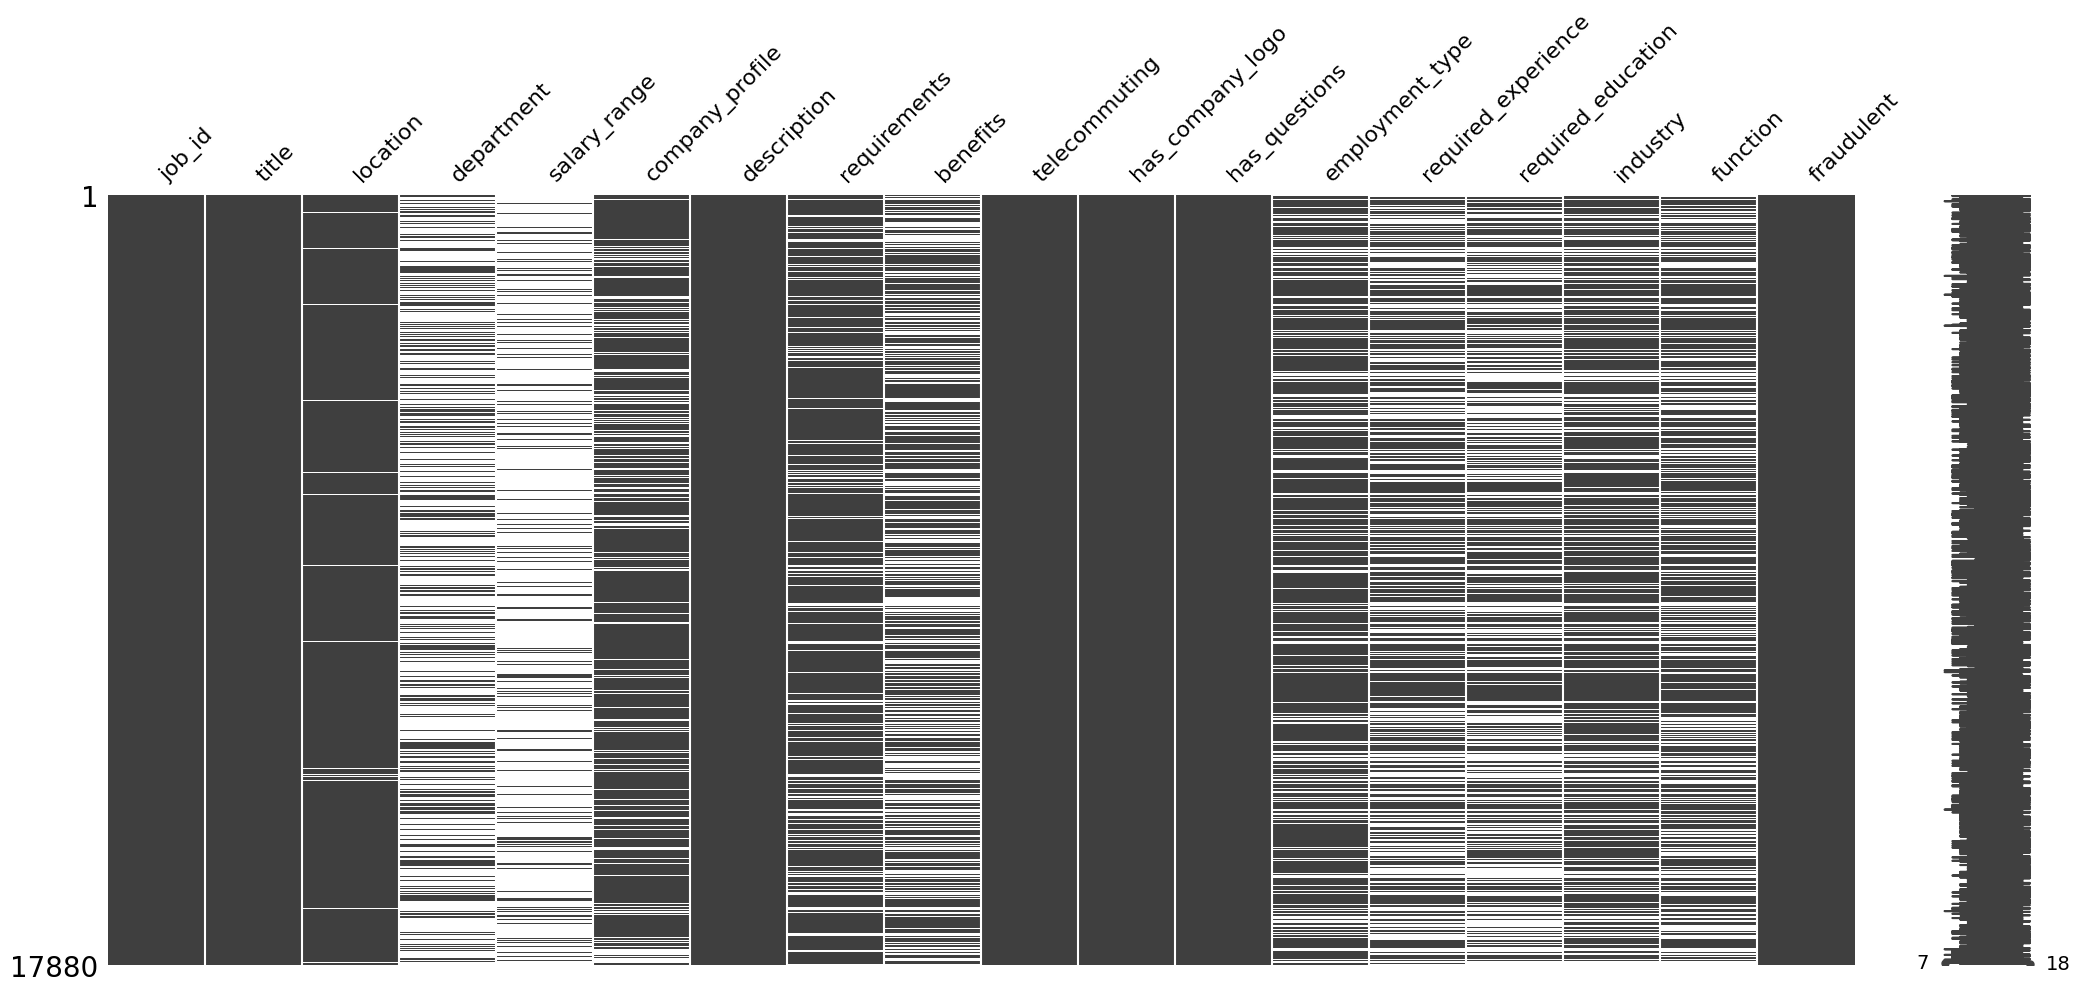

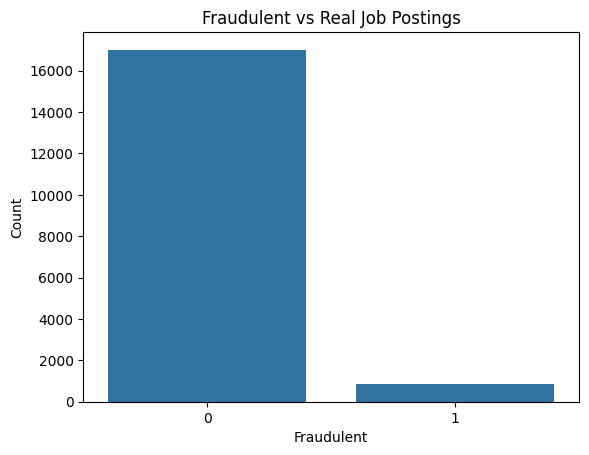

fraudulent
0    0.951566
1    0.048434
Name: proportion, dtype: float64

In [22]:
df.isnull().sum().sort_values(ascending=False)
msno.matrix(df)
plt.show()
sns.countplot(x='fraudulent', data=df)
plt.title("Fraudulent vs Real Job Postings")
plt.xlabel("Fraudulent")
plt.ylabel("Count")
plt.show()

df['fraudulent'].value_counts(normalize=True)


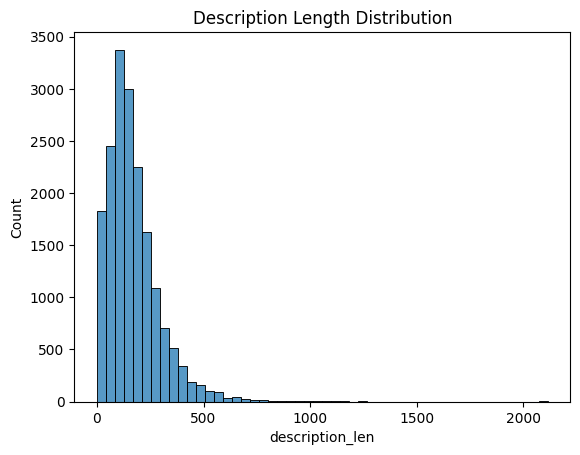

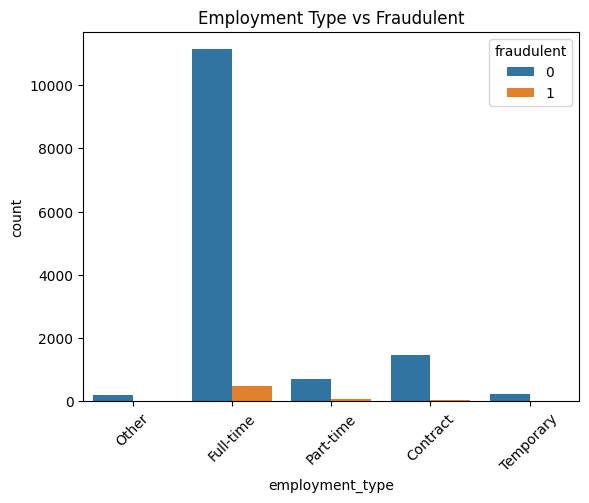

In [23]:
df['description_len'] = df['description'].fillna('').apply(lambda x: len(x.split()))
sns.histplot(df['description_len'], bins=50)
plt.title("Description Length Distribution")
plt.show()
sns.countplot(data=df, x='employment_type', hue='fraudulent')
plt.xticks(rotation=45)
plt.title("Employment Type vs Fraudulent")
plt.show()



In [24]:
print(df.loc[df['fraudulent'] == 1, 'description'].iloc[0])
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Drop nulls for now
df_model = df.dropna(subset=['description'])
X = df_model['description']
y = df_model['fraudulent']

# Vectorize text
vec = TfidfVectorizer(stop_words='english', max_features=1000)
X_vec = vec.fit_transform(X)

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42, stratify=y)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


IC&amp;E Technician | Bakersfield, CA Mt. PosoPrincipal Duties and Responsibilities: Calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.Performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.Performs preventive, predictive and corrective maintenance on equipment, coordinating work with various team members.Designs and installs new equipment and/or system modifications.Troubleshoots and performs maintenance on DC backup power equipment, process controls, programmable logic controls (PLC), and emission monitoring equipment.Uses maintenance reporting system to record time and material use, problem identified and corrected, and further action required; provides complete history of maintenance on equipment.Schedule, coordinate, work with and monitor contractors on specific tasks, as required.Follows safe working practices at all times.Identifies safety 

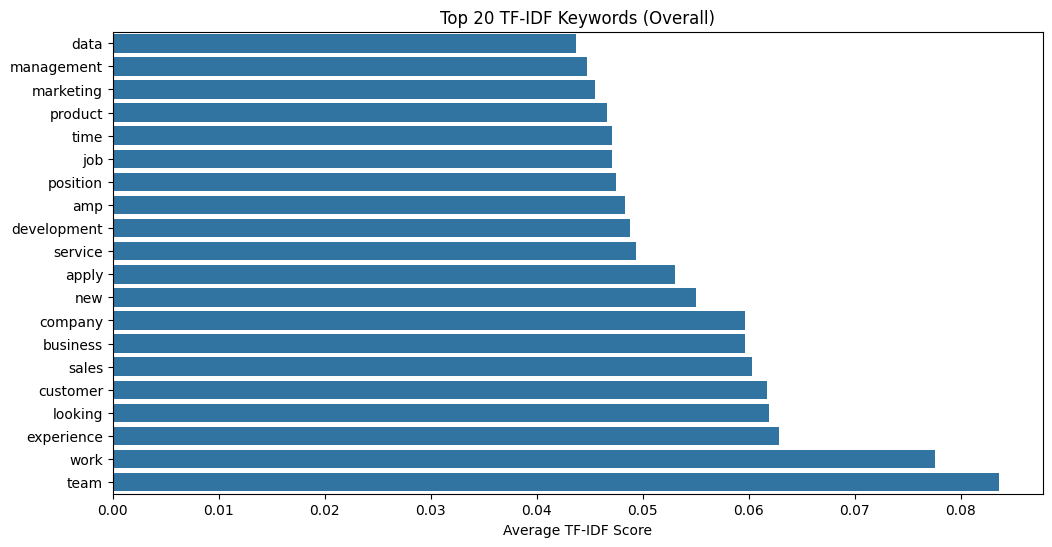

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use description text
df_text = df.dropna(subset=["description"])
texts = df_text["description"]
y = df_text["fraudulent"]

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
X_tfidf = vectorizer.fit_transform(texts)

# View top features
tfidf_words = vectorizer.get_feature_names_out()
tfidf_scores = np.asarray(X_tfidf.mean(axis=0)).flatten()

# Top 20 words by TF-IDF
top_idx = np.argsort(tfidf_scores)[-20:]
top_words = tfidf_words[top_idx]
top_scores = tfidf_scores[top_idx]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_scores, y=top_words)
plt.title("Top 20 TF-IDF Keywords (Overall)")
plt.xlabel("Average TF-IDF Score")
plt.show()


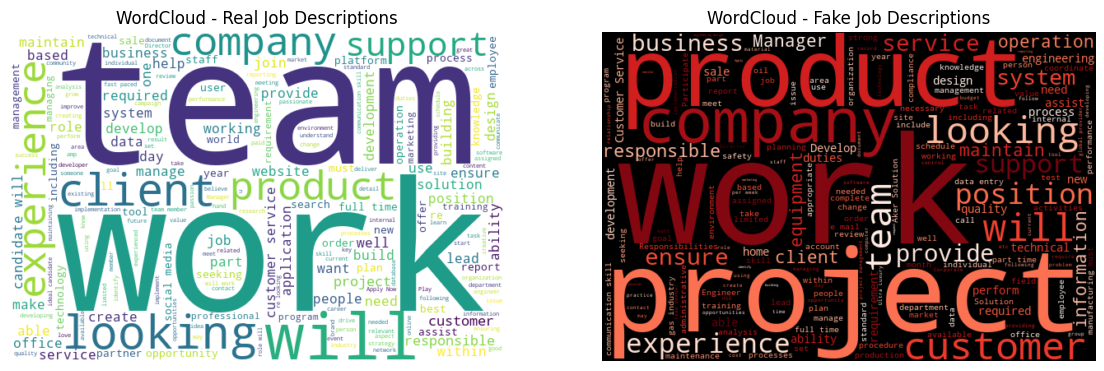

In [30]:
from wordcloud import WordCloud

# WordClouds for each class
real_text = " ".join(df[df['fraudulent'] == 0]['description'].dropna().astype(str).tolist())
fake_text = " ".join(df[df['fraudulent'] == 1]['description'].dropna().astype(str).tolist())

plt.figure(figsize=(14, 6))

# Real Jobs
plt.subplot(1, 2, 1)
wc_real = WordCloud(width=600, height=400, background_color='white').generate(real_text)
plt.imshow(wc_real, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Real Job Descriptions")

# Fake Jobs
plt.subplot(1, 2, 2)
wc_fake = WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(fake_text)
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Fake Job Descriptions")

plt.show()
# Wordcloud for job titles
title_text = " ".join(df['title'].dropna().tolist())
WordCloud(width=800, height=400, background_color="white").generate(title_text).to_image().show()



   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 2.2 MB/s eta 0:01:08
   ---------------------------------------- 1.3/150.0 MB 2.6 MB/s eta 0:00:58
   ---------------------------------------- 1.6/150.0 MB 2.4 MB/s eta 0:01:03
    --------------------------------------- 2.1/150.0 MB 2.4 MB/s eta 0:01:02
    --------------------------------------- 2.9/150.0 MB 2.6 MB/s eta 0:00:57
   - -------------------------------------- 3.9/150.0 MB 2.9 MB/s eta 0:00:51
   - -------------------------------------- 4.5/150.0 MB 2.9 MB/s eta 0:00:50
   - -------------------------------------- 5.5/150.0 MB 3.2 MB/s eta 0:00:46
   - -------------------------------------- 6.6/150.0 MB 3.4 MB/s eta 0:00:43
   -- ------------------------------------- 7.6/150.0 MB 3.6 MB/s eta 0:00:40
   -- ------------------------------------- 8.9/150.0 MB 3.8 MB/s eta 0:00:38


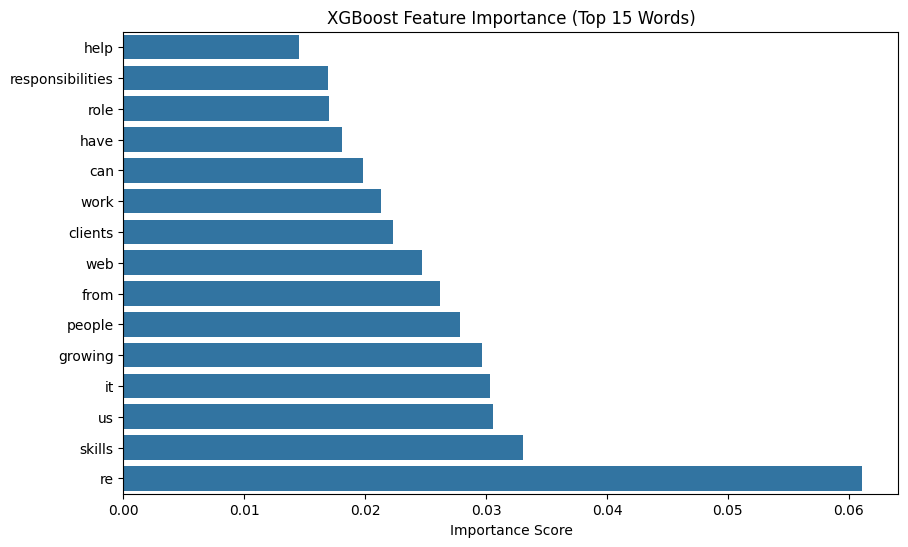

In [28]:
%pip install xgboost

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Basic XGBoost with TF-IDF only (no other features)
vec = TfidfVectorizer(max_features=100)
X_vec = vec.fit_transform(df_text['description'])
y_vec = df_text['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X_vec, y_vec, test_size=0.2, stratify=y_vec)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Get feature importance
feature_importance = xgb.feature_importances_
top_idx = np.argsort(feature_importance)[-15:]
top_features = vec.get_feature_names_out()[top_idx]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[top_idx], y=top_features)
plt.title("XGBoost Feature Importance (Top 15 Words)")
plt.xlabel("Importance Score")
plt.show()


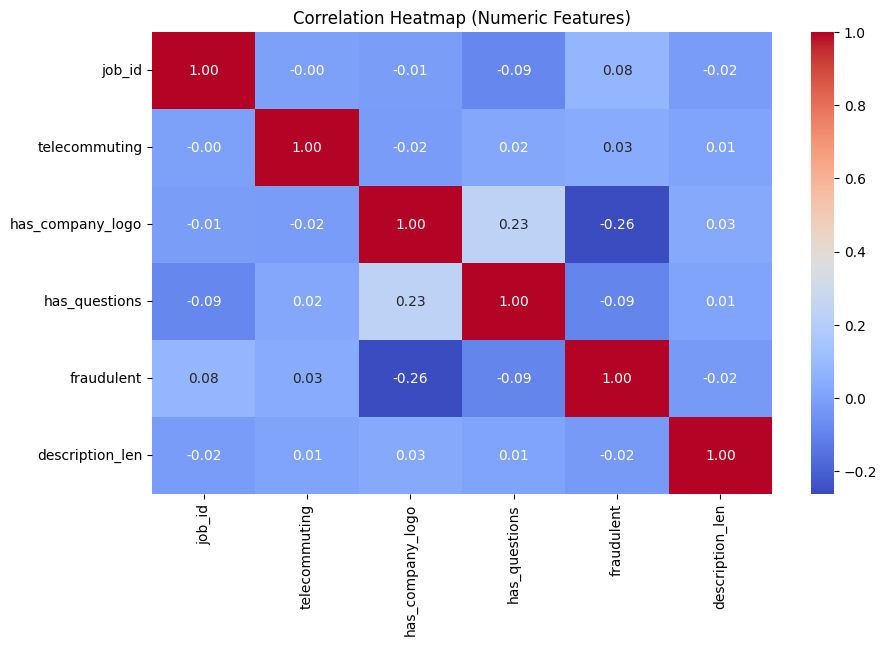

In [29]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Check for correlations
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [35]:
%pip install spacy
!python -m spacy download en_core_web_sm

import spacy
nlp = spacy.load("en_core_web_sm")

# Choose a real and fake job description
real_text = df[df['fraudulent'] == 0]['description'].dropna().iloc[0]
fake_text = df[df['fraudulent'] == 1]['description'].dropna().iloc[0]

# Process text
real_doc = nlp(real_text)
fake_doc = nlp(fake_text)

# Print Named Entities
print("🔹 Real Job Named Entities:")
for ent in real_doc.ents:
    print(ent.text, "-", ent.label_)

print("\n🔹 Fake Job Named Entities:")
for ent in fake_doc.ents:
    print(ent.text, "-", ent.label_)


Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.8 MB 914.1 kB/s eta 0:00:14
     - ------------------------------------- 0.5/12.8 MB 914.1 kB/s eta 0:00:14
     -- ------------------------------------ 0.8/12.8 MB 715.7 kB/s eta 0:00:17
     --- ----------------------------------- 1.0/12.8 MB 861.8 kB/s eta 0:00:14
     --- ----------------------------------- 1.0/12.8 MB 861.8 kB/s eta 0:00:14
     --- ----------------------------------- 1.3/12.8 MB 824.3 kB/s eta 0:00:14
     --- ----------------------------------- 1.3/12.8 MB 824.3 kB/s eta 0:00:14
     ---- ---------------------------------- 1.6/12.8 MB 802.2 kB/s eta 0:00:15
     ----- --------------------------------- 1.8/12.8 MB 799.2 kB/s eta 0:00:1